In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
train_file = 'Data_Science_Test_Datasets/Credit_Card_Default_Data/Dataset_Credit_Card_Defaults_Train_Data.xls'
test_file ='Data_Science_Test_Datasets/Credit_Card_Default_Data/Dataset_Credit_Card_Defaults_Test_Data.xls'
df_train = pd.read_excel(train_file,skiprows=1)
df_test = pd.read_excel(test_file, skiprows=1)
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,27998,400000,2,1,1,31,-1,-1,-1,-1,...,2833,1162,325,325,5581,2833,1162,325,325,325
1,27999,230000,2,2,1,30,0,0,0,0,...,216287,215927,174259,174486,9800,8502,8350,6200,6500,6500
2,28000,90000,2,5,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,28001,30000,2,2,1,29,1,2,2,2,...,29703,28700,28300,25520,0,3500,0,0,1000,0
4,28002,150000,2,1,2,29,0,0,0,0,...,136196,105989,98836,94504,5200,7982,4500,4048,3800,3818


There is missing data in some cells, lets transform it to 0

In [3]:
df_train = df_train.replace(r'\s+', 0, regex=True)
df_test = df_test.replace(r'\s+', 0, regex=True)
df_test.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,27998,400000,2,1,1,31,-1,-1,-1,-1,...,2833,1162,325,325,5581,2833,1162,325,325,325
1,27999,230000,2,2,1,30,0,0,0,0,...,216287,215927,174259,174486,9800,8502,8350,6200,6500,6500
2,28000,90000,2,5,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,28001,30000,2,2,1,29,1,2,2,2,...,29703,28700,28300,25520,0,3500,0,0,1000,0
4,28002,150000,2,1,2,29,0,0,0,0,...,136196,105989,98836,94504,5200,7982,4500,4048,3800,3818


In [5]:
df_train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27997.00000,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000,...,27997.000000,27997.000000,27997.000000,27997.000000,2.799700e+04,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000
mean,13999.00000,167088.605208,1.604529,1.845805,1.556524,35.380612,-0.010608,-0.130085,-0.163267,-0.217452,...,43217.823338,40384.629210,38899.866343,5579.700146,5.847399e+03,5131.263385,4813.460835,4755.512734,5184.202129,0.221809
std,8082.18208,129739.177264,0.488960,0.785716,0.521293,9.276465,1.122925,1.194750,1.195265,1.163363,...,64228.678686,60755.918064,59431.362803,15162.864174,2.105200e+04,16606.929936,15307.846683,14888.160851,17603.588702,0.415471
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.00000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2379.000000,1800.000000,1269.000000,1000.000000,8.390000e+02,390.000000,294.000000,264.000000,109.000000,0.000000
50%,13999.00000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19129.000000,18239.000000,17212.000000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20998.00000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54382.000000,50149.000000,49160.000000,5005.000000,5.000000e+03,4500.000000,4010.000000,4026.000000,4000.000000,0.000000
max,27997.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000,1.000000


There are some undocumented things

In [6]:
df_train[['SEX','EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,27997.000000,27997.000000,27997.000000
mean,1.604529,1.845805,1.556524
std,0.488960,0.785716,0.521293
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


- Education has 0, 5, 6 those are undocumented 
- Marriage has 0 that is undocumented

In [7]:
df_train[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000,27997.000000
mean,-0.010608,-0.130085,-0.163267,-0.217452,-0.260528,-0.285459
std,1.122925,1.194750,1.195265,1.163363,1.130689,1.147013
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


- PAY_X has -2 that is undocumented

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27997 entries, 0 to 27996
Data columns (total 25 columns):
ID                            27997 non-null int64
LIMIT_BAL                     27997 non-null int64
SEX                           27997 non-null int64
EDUCATION                     27997 non-null int64
MARRIAGE                      27997 non-null int64
AGE                           27997 non-null int64
PAY_0                         27997 non-null int64
PAY_2                         27997 non-null int64
PAY_3                         27997 non-null int64
PAY_4                         27997 non-null int64
PAY_5                         27997 non-null int64
PAY_6                         27997 non-null int64
BILL_AMT1                     27997 non-null int64
BILL_AMT2                     27997 non-null int64
BILL_AMT3                     27997 non-null int64
BILL_AMT4                     27997 non-null int64
BILL_AMT5                     27997 non-null int64
BILL_AMT6               

Let's see the distribution of the default and not default

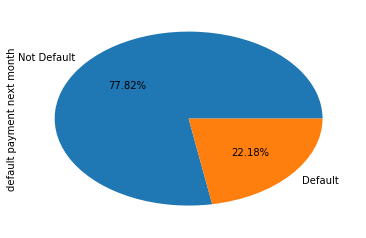

In [9]:
df_train['default payment next month'].value_counts().plot.pie(labels=["Not Default","Default"], autopct='%1.2f%%')


It is imbalanced. So we need to resovlve the imbalanced problem in model

Let's take some brief analysis

/home/thanhvo/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


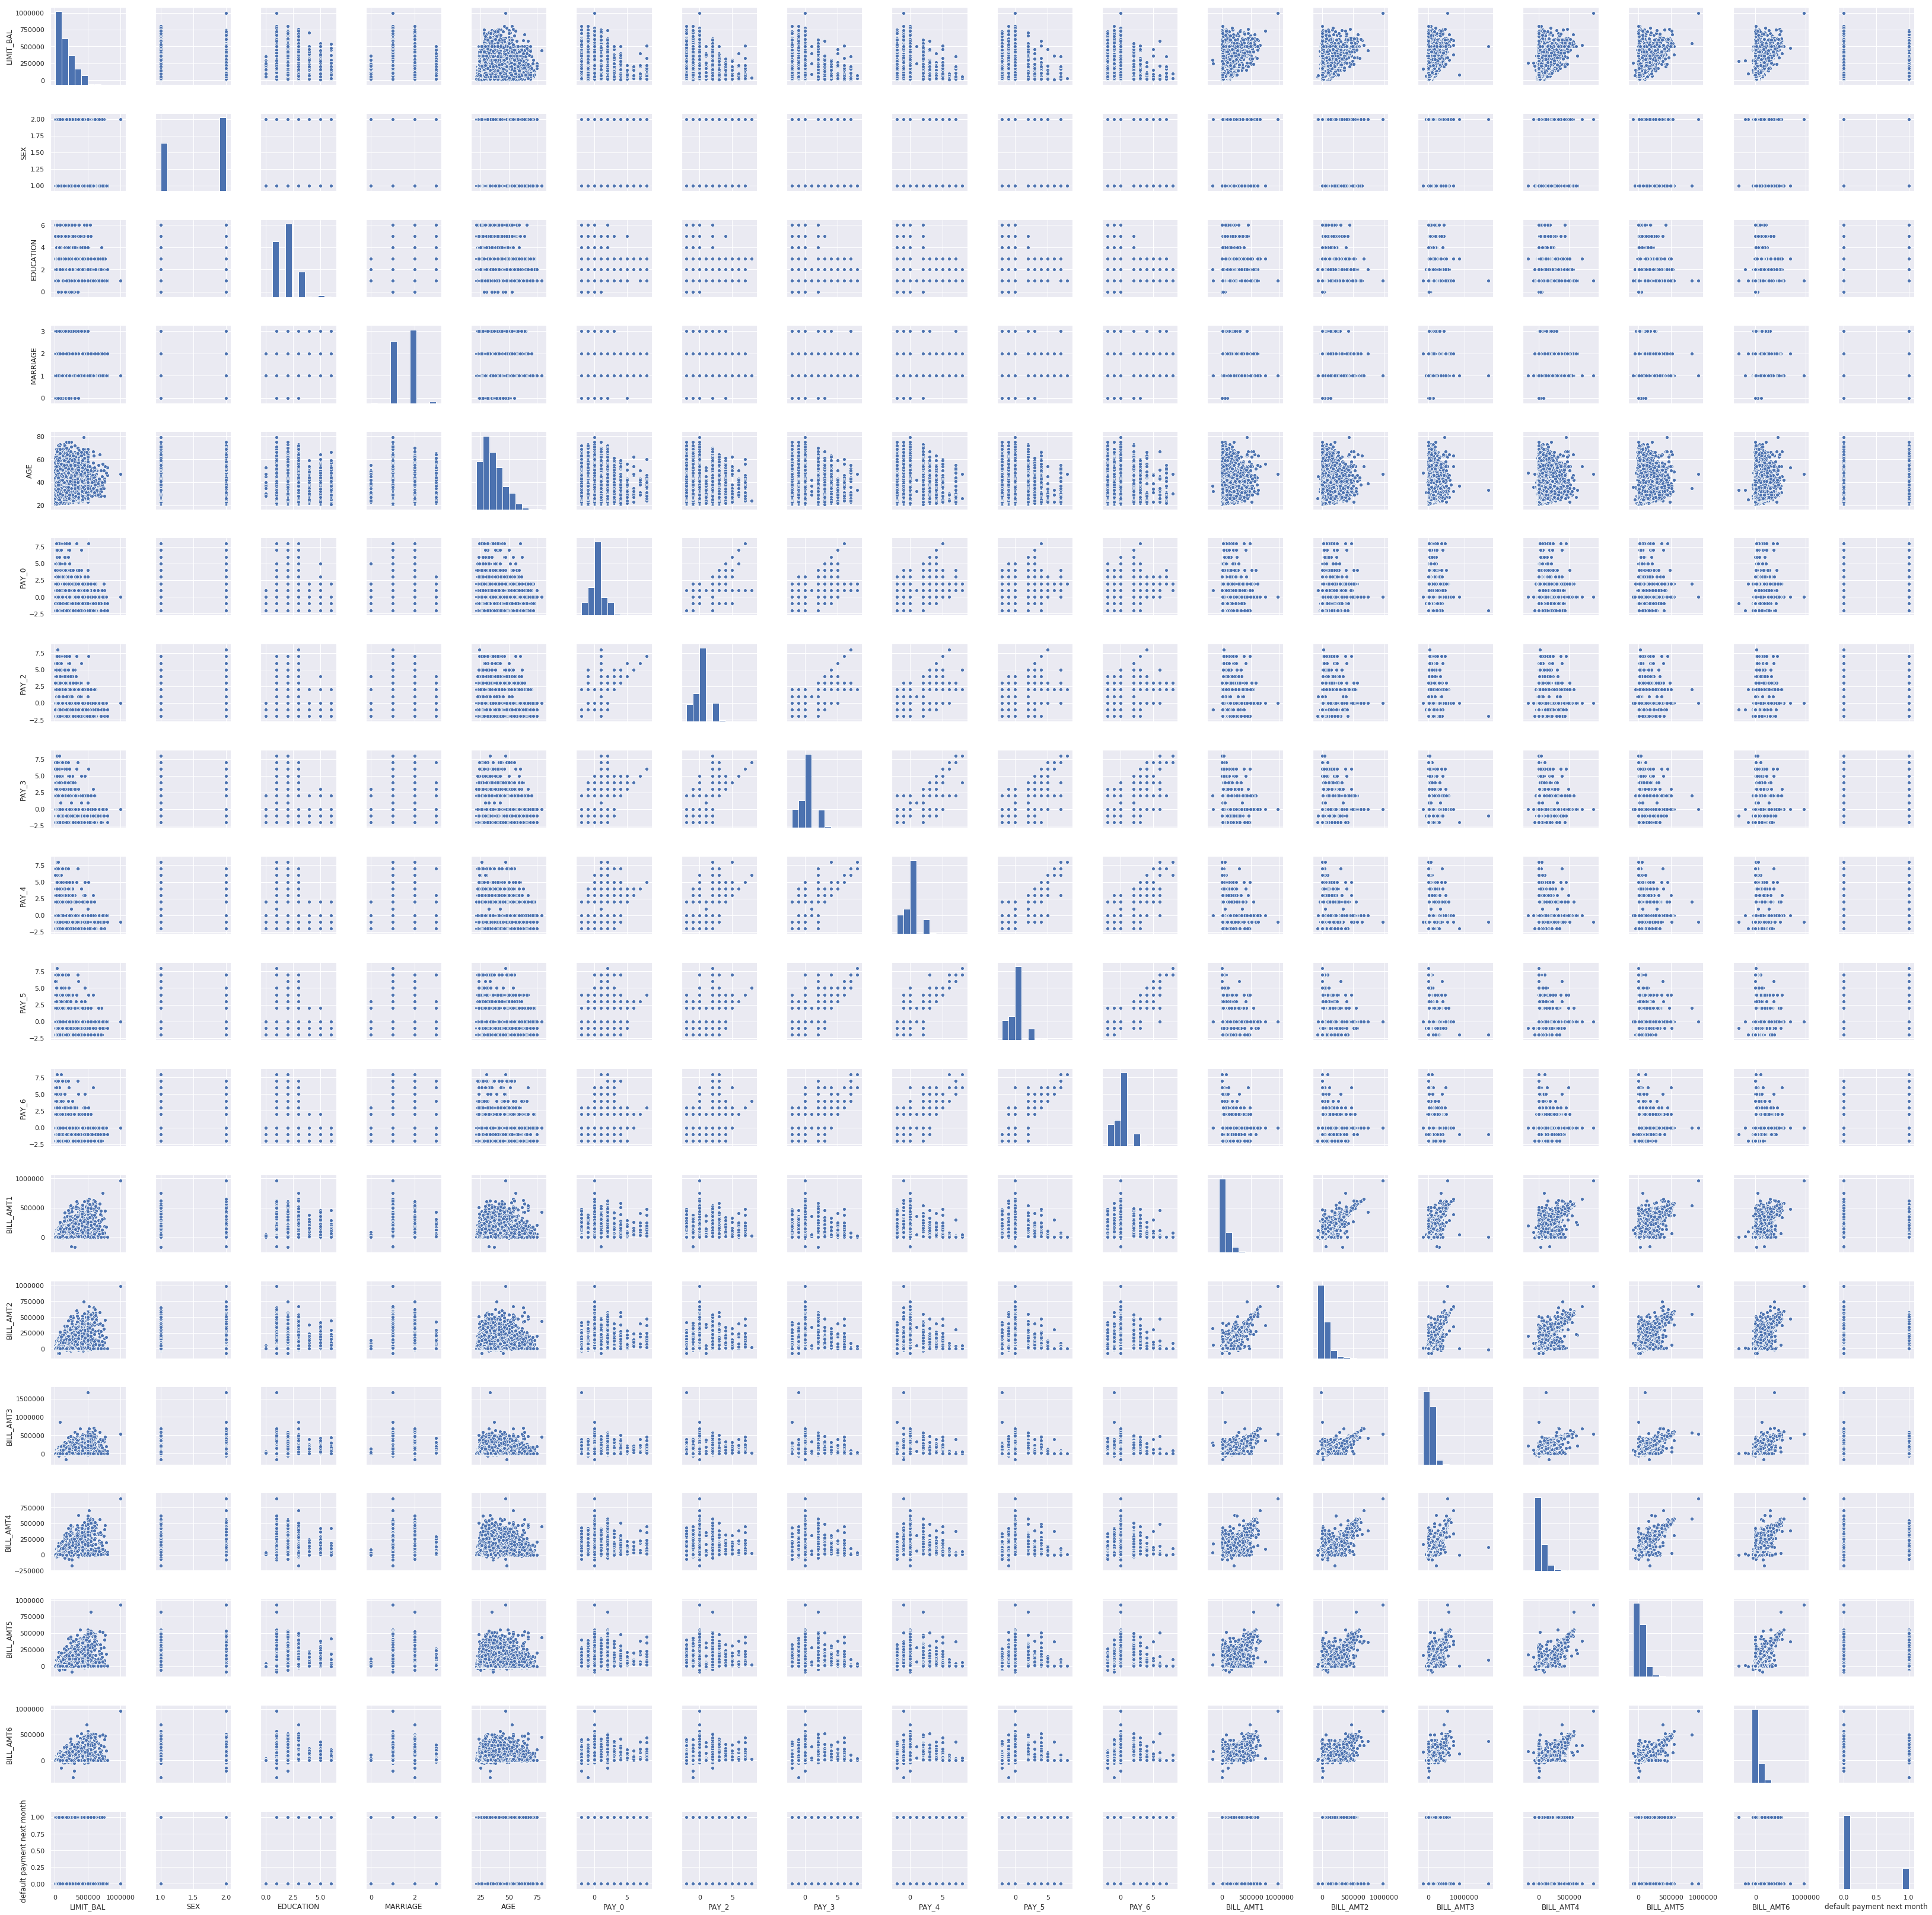

In [10]:
sns.set()
cols = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
        'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','default payment next month']

sns.pairplot(df_train[cols], size = 2.5)
plt.show()

It's hard to understand. Let's do other ways.

/home/thanhvo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


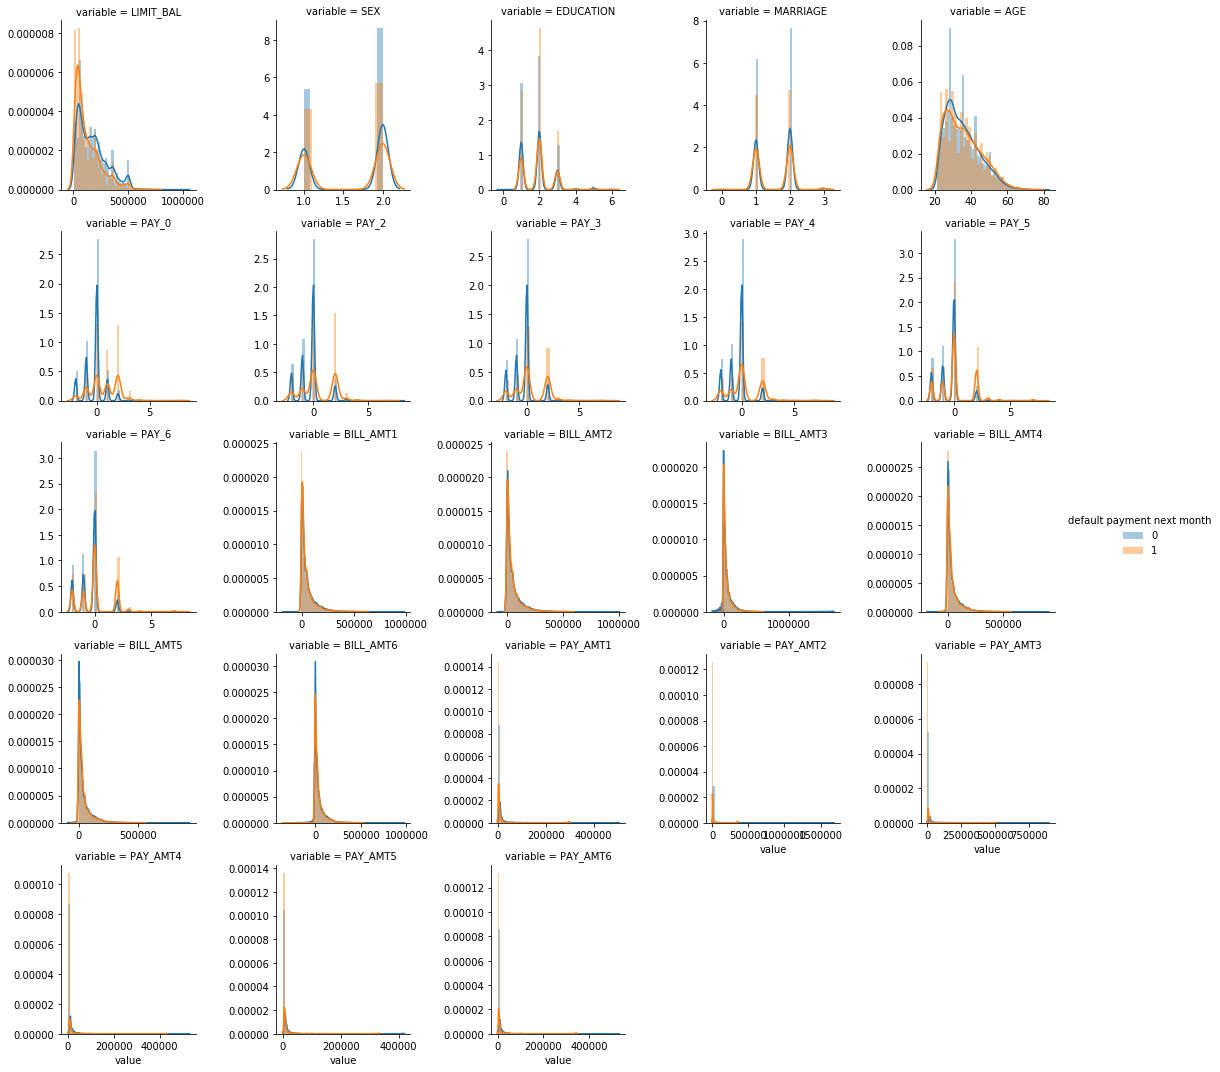

In [4]:
label_goal = 'default payment next month'
label_features = [f for f in df_train.columns if df_train.dtypes[f] != 'object']
label_features.remove("ID")
label_features.remove(label_goal)

f = pd.melt( df_train, id_vars=label_goal, value_vars=label_features)
g = sns.FacetGrid( f, hue=label_goal, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

- Low LIMIT_BALL has higher propotion with DEFAULT 
- SEX (Female) has higher propotion with NOT DEFAULT 
- Education (1 & 2) has higher propotion with NOT DEFAULT 
- MArriage  (2) has higher propotion with NOT DEFAULT 
- AGE (from 30-40) has higher propotion with NOT DEFAULT 
- PAY_X with zero or negative has higher propotion with NOT DEFAULT 
- BILL_AMTX and PAY_AMTX have skew distribution, let resolve it by taking log transform

/home/thanhvo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


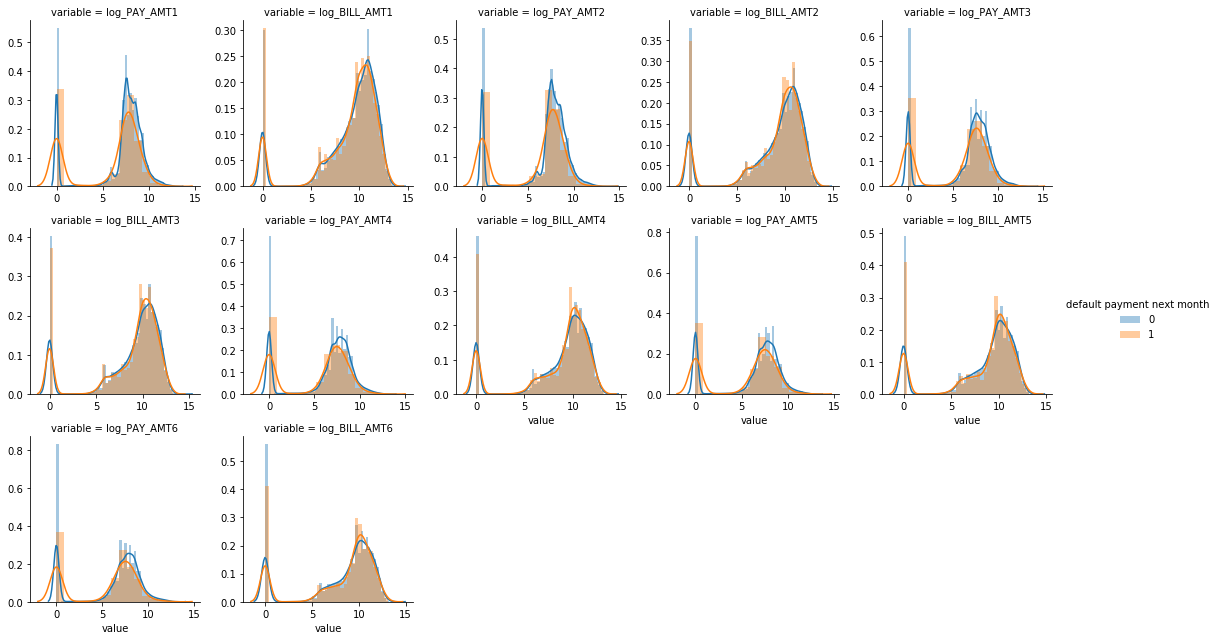

In [5]:
logged = []
for i in range(1,7):
    df_train["log_PAY_AMT"+str(i)] = df_train["PAY_AMT"  + str( i )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    df_train["log_BILL_AMT"+str(i)] = df_train["BILL_AMT" + str( i )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    
    df_test["log_PAY_AMT"+str(i)] = df_test["PAY_AMT"  + str( i )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    df_test["log_BILL_AMT"+str(i)] = df_test["BILL_AMT" + str( i )].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    logged.append("log_PAY_AMT" + str( i ) )
    logged.append("log_BILL_AMT" + str( i ) )
    label_features.remove("PAY_AMT"  + str( i ))
    label_features.remove("BILL_AMT" + str( i ))

f = pd.melt( df_train, id_vars=label_goal, value_vars=logged)
g = sns.FacetGrid( f, hue=label_goal, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

Let's check correlation matrix

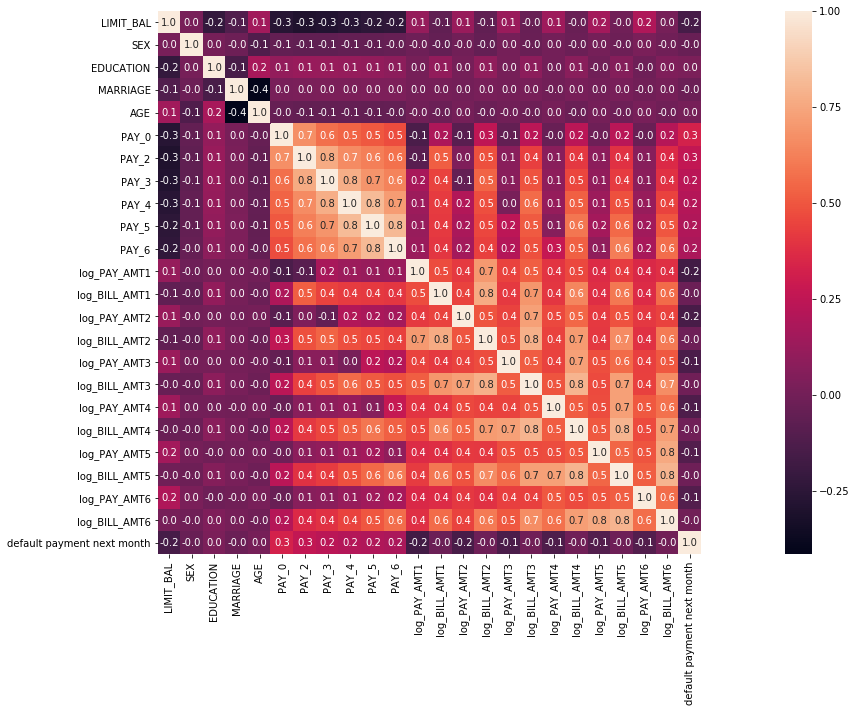

In [6]:

cormat = df_train[label_features+logged+[label_goal]].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( cormat, square=True, annot=True, fmt=".1f" )  

PAY_X, LIMIT_BALL have strongest relation with default label, then log_PAY_AMTX

### Try No.1: Take it all
- Let use all the features without considering about the imbalanced problem

In [7]:
features = label_features+logged
X = df_train[features].values
Y = df_train[label_goal].values 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size= 0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25197, 23)
(25197,)
(2800, 23)
(2800,)


Since it is an imbalanced problem, it's better to output the AUC of ROC (Area under the curve of Receiver Operating Characteristic). In addition, I also print accuracy, precision, recall and f1-score.

In [9]:
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix, precision_score, recall_score, f1_score

In [25]:
def statistic_number(model_name, y_test, y_pred, y_score):
    print("Model:{}".format(model_name))
    print("Accuracy:{}".format(accuracy_score(y_test,y_pred)))
    print("Precision Score:{}".format(precision_score(y_test,y_pred)))
    print("Recall score:{}".format(recall_score(y_test,y_pred)))
    print("F1 score:{}".format(f1_score(y_test,y_pred)))
    fpr, tpr,_ = roc_curve(y_test,y_score[:,1])
    roc_auc = auc(fpr, tpr)
    print("ROC AUC:{}\n".format(roc_auc))
          

In [11]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [12]:
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.fit_transform(X_test)

Define models here

In [13]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,  RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [46]:
# Gradient Boosting Model
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting", y_test,y_pred, y_score)


Model:Gradient Boosting
Accuracy:0.8182142857142857
Precision Score:0.7030812324929971
Recall score:0.3837920489296636
F1 score:0.4965380811078141
ROC AUC:0.7892733369243967


In [48]:
#Kernel SVM
clf = svm.SVC(kernel='rbf', C=1, probability=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("SVM", y_test,y_pred, y_score)

Model:SVM
Accuracy:0.8185714285714286
Precision Score:0.7172619047619048
Recall score:0.36850152905198774
F1 score:0.48686868686868695
ROC AUC:0.732884022903004


In [47]:
# Ada Boosting Model
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm='SAMME', n_estimators=200)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Adaboost", y_test,y_pred, y_score)


Model:Adaboost
Accuracy:0.8171428571428572
Precision Score:0.7113095238095238
Recall score:0.3654434250764526
F1 score:0.4828282828282829
ROC AUC:0.7774071524862414


In [54]:
clf =RandomForestClassifier(n_estimators = 100, class_weight = "balanced")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("RandomForest", y_test,y_pred, y_score)

Model:RandomForest
Accuracy:0.8128571428571428
Precision Score:0.6934523809523809
Recall score:0.3562691131498471
F1 score:0.47070707070707074
ROC AUC:0.7778610229970558


Let's try with a popular classification named [XGB]( https://xgboost.readthedocs.io/en/latest/python/python_intro.html)

In [14]:
from xgboost import XGBClassifier

In [15]:
clf = XGBClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("XGB", y_test,y_pred, y_score)

Model:XGB
Accuracy:0.825
Precision Score:0.6871508379888268
Recall score:0.3942307692307692
F1 score:0.5010183299389002
ROC AUC:0.7914807073670814


Right now, **XGB** and **GradientBoosting** seem to be two of the best models with ROC AUC: **79.29%** and **78.92%** and f1-score are: **50.10%** and **49.65%**. Now I stop here and try to resolve the imbalanced data

## Try No 2: Resolve Imbalanced Data

In imblanced data, there are two main ways to resolve it:
    - Undersampling: try to reduce the majority class in the same as the number of minority
    - Oversampling: try to increase the minority class in the same as the number of minority

To resolve it, I use [imbalanced-learn](https://imbalanced-learn.org/en/stable/install.html), a small contribution from sklearn. I try with three ways:
- Oversampling: I use RandomOverSampler, ADASYN, SMOTE 
- Undersampling: I use RandomUnderSampler, EditedNearestNeighbours
- Combine two methods by oversampling by SMOTE and then use undersampling to get clearner space

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler 
ros = RandomOverSampler(random_state= 0)
x_randomover,y_randomover = ros.fit_sample(X_train, y_train)
x_smote, y_smote = SMOTE().fit_sample(X_train,y_train)
x_adasync, y_adasync = ADASYN().fit_sample(X_train, y_train)
print(sorted(Counter(y_randomover).items()))
print(sorted(Counter(y_smote).items()))
print(sorted(Counter(y_randomover).items()))

[(0, 19611), (1, 19611)]
[(0, 19611), (1, 19611)]
[(0, 19611), (1, 19611)]


In [20]:
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold
from sklearn.linear_model import LogisticRegression
iht = InstanceHardnessThreshold(random_state=0,estimator=LogisticRegression(solver='lbfgs', multi_class='auto'))
x_iht, y_iht = iht.fit_sample(X_train, y_train)
rus = RandomUnderSampler(random_state=0, replacement=True)
x_rus, y_rus =  rus.fit_sample(X_train, y_train)
print(sorted(Counter(y_iht).items()))
print(sorted(Counter(y_rus).items()))


[(0, 5586), (1, 5586)]
[(0, 5586), (1, 5586)]


In [23]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
x_smote_enn, y_smote_enn = smote_enn.fit_sample(X_train,y_train)

In [26]:
#Train again with Gradient Boosting
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
#RandomOverSampler
clf.fit(x_randomover,y_randomover)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & RandomOverSampler", y_test,y_pred, y_score)
#SMOTE
clf.fit(x_smote,y_smote)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & SMOTE", y_test,y_pred, y_score)
#ADASYNC
clf.fit(x_adasync,y_adasync)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & ADASYNC", y_test,y_pred, y_score)
#RandomUnderSampler
clf.fit(x_rus,y_rus)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & RandomUnderSampler", y_test,y_pred, y_score)
#InstanceHardnessThreshold
clf.fit(x_iht,y_iht)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & InstanceHardnessThreshold", y_test,y_pred, y_score)
#SMOTEENN
clf.fit(x_smote_enn,y_smote_enn)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & SMOTEENN", y_test,y_pred, y_score)

Model:Gradient Boosting & RandomOverSampler
Accuracy:0.765
Precision Score:0.47980997624703087
Recall score:0.6474358974358975
F1 score:0.5511596180081856
ROC AUC:0.7874864489064857

Model:Gradient Boosting & SMOTE
Accuracy:0.2532142857142857
Precision Score:0.2286348501664817
Recall score:0.9903846153846154
F1 score:0.37150586113615874
ROC AUC:0.659734987745098

Model:Gradient Boosting & ADASYNC
Accuracy:0.22607142857142856
Precision Score:0.22357577929057684
Recall score:1.0
F1 score:0.36544655929721814
ROC AUC:0.6028296008908371

Model:Gradient Boosting & RandomUnderSampler
Accuracy:0.7485714285714286
Precision Score:0.4557522123893805
Recall score:0.6602564102564102
F1 score:0.5392670157068062
ROC AUC:0.7828264193297513

Model:Gradient Boosting & InstanceHardnessThreshold
Accuracy:0.4675
Precision Score:0.2784874808380174
Recall score:0.8733974358974359
F1 score:0.42231693142192955
ROC AUC:0.7521018924396681

Model:Gradient Boosting & SMOTEENN
Accuracy:0.25821428571428573
Precision

In [27]:
#Train again with XGV
clf =  XGBClassifier()
#RandomOverSampler
clf.fit(x_randomover,y_randomover)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & RandomOverSampler", y_test,y_pred, y_score)
#SMOTE
clf.fit(x_smote,y_smote)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & SMOTE", y_test,y_pred, y_score)
#ADASYNC
clf.fit(x_adasync,y_adasync)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & ADASYNC", y_test,y_pred, y_score)
#RandomUnderSampler
clf.fit(x_rus,y_rus)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & RandomUnderSampler", y_test,y_pred, y_score)
#InstanceHardnessThreshold
clf.fit(x_iht,y_iht)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & InstanceHardnessThreshold", y_test,y_pred, y_score)
#SMOTEENN
clf.fit(x_smote_enn,y_smote_enn)
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
statistic_number("Gradient Boosting & SMOTEENN", y_test,y_pred, y_score)

Model:Gradient Boosting & RandomOverSampler
Accuracy:0.7675
Precision Score:0.4840236686390533
Recall score:0.655448717948718
F1 score:0.5568413886997958
ROC AUC:0.7918890813536953

Model:Gradient Boosting & SMOTE
Accuracy:0.26785714285714285
Precision Score:0.23053665910808768
Recall score:0.9775641025641025
F1 score:0.3730886850152906
ROC AUC:0.6993111772954375

Model:Gradient Boosting & ADASYNC
Accuracy:0.2257142857142857
Precision Score:0.22329749103942653
Recall score:0.9983974358974359
F1 score:0.3649677797305214
ROC AUC:0.5678184359681373

Model:Gradient Boosting & RandomUnderSampler
Accuracy:0.7596428571428572
Precision Score:0.4718714121699196
Recall score:0.6586538461538461
F1 score:0.5498327759197325
ROC AUC:0.7861221336491327

Model:Gradient Boosting & InstanceHardnessThreshold
Accuracy:0.48892857142857143
Precision Score:0.2850293020777837
Recall score:0.8573717948717948
F1 score:0.42782886845261897
ROC AUC:0.7504370964130844

Model:Gradient Boosting & SMOTEENN
Accuracy:0.

It looks like that **XGB** and **Gradient Boosting** could improve f1-score **55.68%** and **55.11%** when using with **RandomOverSampler**. The ROC AUCs are nearly the same as the previous approach

### Try No 3: Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score

In [31]:
#Choose cross validation number is 5
X_full = standardScaler.fit_transform(X)
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
score_gradient = cross_val_score(clf,X_full,Y,cv=5)
print("Mean Gradient CrossVal Accuracy:%.2f, with std=%.2f" % (score_gradient.mean(), score_gradient.std() ))

clf = XGBClassifier()
score_gradient = cross_val_score(clf,X_full,Y,cv=5)
print("Mean XGB CrossVal Accuracy:%.2f, with std=%.2f" % (score_gradient.mean(), score_gradient.std() ))

Mean Gradient CrossVal Accuracy:0.82, with std=0.01
Mean XGB CrossVal Accuracy:0.82, with std=0.01


Nothing improvement 

In machine learning and sklearn, we could use GridSearch function to tune and find the best parameters for GradientBoosting Model and XGB Model. However, from my experiences, it is a long process and the accuracy sometimes is not much improved. So I leave it and stop here. 

### Evaluation in TEST SET

Now I choose 4 model and combination:
- XGB and original dataset
- XGB and RandomOverSampler in dataset
- Gradient and original dataset
- Gradient and RandomOverSampler in dataset 

I will train model with 4 configurations and predict in the df_test

In [35]:
X_df_test = df_test[features].values
print(X_test.shape)

(2003, 23)


In [36]:
X_df_test_standard = standardScaler.fit_transform(X_test)

In [44]:
#train 4 models 
clf_xgb = XGBClassifier()
clf_gradient = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)



In [45]:
#XGB and original dataset 
clf_xgb.fit(X_train,y_train)
y_pred = clf_xgb.predict(X_df_test_standard)
y_score = clf_xgb.predict_proba(X_df_test_standard)
res = {"ID":df_test["ID"].values,"0":y_score[:,0],"1":y_score[:,1]}
df_result = pd.DataFrame(res)
df_result.head()
df_result.to_csv("xgb_original_dataset.csv",index=False)

In [46]:
#XGB and RandomOverSampler in dataset
clf_xgb.fit(x_randomover,y_randomover)
y_pred = clf_xgb.predict(X_df_test_standard)
y_score = clf_xgb.predict_proba(X_df_test_standard)
res = {"ID":df_test["ID"].values,"0":y_score[:,0],"1":y_score[:,1]}
df_result = pd.DataFrame(res)
df_result.head()
df_result.to_csv("xgb_randomover_dataset.csv",index=False)

In [47]:
# Gradient and original dataset
clf_gradient.fit(X_train,y_train)
y_pred = clf_gradient.predict(X_df_test_standard)
y_score = clf_gradient.predict_proba(X_df_test_standard)
res = {"ID":df_test["ID"].values,"0":y_score[:,0],"1":y_score[:,1]}
df_result = pd.DataFrame(res)
df_result.head()
df_result.to_csv("gradient_original_dataset.csv",index=False)

In [48]:
# Gradient and RandomOverSampler in dataset
clf_gradient.fit(x_randomover,y_randomover)
y_pred = clf_gradient.predict(X_df_test_standard)
y_score = clf_gradient.predict_proba(X_df_test_standard)
res = {"ID":df_test["ID"].values,"0":y_score[:,0],"1":y_score[:,1]}
df_result = pd.DataFrame(res)
df_result.head()
df_result.to_csv("gradient_randomover_dataset.csv",index=False)

The later result could be combined from 4 result csv file in many ways such as: taking average, compute geometric mean, etc..